In [1]:
pwd

'/home/avani/src/dataset_div'

In [2]:
cd ..

/home/avani/src


In [3]:
from utils import calc_third_quartile, get_unique_act, get_compliant_cases, plot_case_occ 
import numpy as np
import os
import pickle
import pandas as pd
import random
from statistics import mean, median

In [4]:
env_name = "bpi_12_w"
df2 = pd.read_pickle('dataset/preprocessed/'+env_name+'_design_mat.pkl')

In [5]:
df2

,0,1,2,3,4,5,6,duration_time,remaining_time,class,CaseID
0,0,0,0,1,0,0,0,0.000000,11.952778,3,173688
1,0,0,0,0,0,1,0,0.022222,11.930556,5,173688
2,0,0,0,0,0,1,0,7.177083,4.753472,5,173688
3,0,0,0,0,0,1,0,1.792361,2.961111,5,173688
4,0,0,0,0,0,0,1,2.961111,0.000000,6,173688
...,...,...,...,...,...,...,...,...,...,...,...
72408,0,1,0,0,0,0,0,0.000000,0.000000,1,214370
72409,0,1,0,0,0,0,0,0.000000,9.140972,1,214373
72410,0,0,0,1,0,0,0,0.454861,8.686111,3,214373
72411,0,0,0,0,0,1,0,8.686111,0.000000,5,214373


In [8]:
caseId_lis = df["CaseID"].unique()
num_cases = len(caseId_lis)
num_cases

6607

In [6]:
# get process flow compliance cases only
df = get_compliant_cases(df2,env_name)   
df

,0,1,2,3,4,5,6,duration_time,remaining_time,class,CaseID
0,0,0,0,1,0,0,0,0.000000,11.952778,3,173688
1,0,0,0,0,0,1,0,0.022222,11.930556,5,173688
2,0,0,0,0,0,1,0,7.177083,4.753472,5,173688
3,0,0,0,0,0,1,0,1.792361,2.961111,5,173688
4,0,0,0,0,0,0,1,2.961111,0.000000,6,173688
...,...,...,...,...,...,...,...,...,...,...,...
72406,0,0,0,0,0,1,0,0.021528,7.009722,5,214364
72407,0,0,0,0,0,1,0,7.009722,0.000000,5,214364
72409,0,1,0,0,0,0,0,0.000000,9.140972,1,214373
72410,0,0,0,1,0,0,0,0.454861,8.686111,3,214373


In [7]:
caseId_lis = df2["CaseID"].unique()
num_cases = len(caseId_lis)
num_cases

9658

In [7]:
import random
random.shuffle(caseId_lis)

In [8]:
train_cases_start = 0
train_cases_end = int(.65*num_cases)
val_cases_start = train_cases_end
val_cases_end = int(val_cases_start + .1*num_cases)
test_cases_start = val_cases_end 
test_cases_end = num_cases


In [9]:
cases_train = caseId_lis[train_cases_start:train_cases_end]
cases_val = caseId_lis[val_cases_start:val_cases_end]
cases_test = caseId_lis[test_cases_start:test_cases_end]

In [10]:
# df = pd.read_pickle('dataset/preprocessed/helpdesk.pkl')
dat_group = df2.groupby("CaseID")

total_iter = len(dat_group.ngroup())
case_duration_dic = {}
for name, gr in dat_group:
    case_duration_dic[name] = gr['duration_time'].sum()
    

In [11]:
max(df2['duration_time'])

30.92222222222222

In [12]:
case_duration_dic

{173688: 11.95277777777778,
 173691: 9.106944444444444,
 173694: 34.229166666666664,
 173703: 0.05694444444444444,
 173706: 0.19722222222222224,
 173709: 30.991666666666667,
 173712: 2.188888888888889,
 173715: 11.971527777777778,
 173718: 25.940277777777776,
 173721: 9.213888888888889,
 173724: 2.1500000000000004,
 173730: 19.800694444444446,
 173733: 0.0,
 173736: 16.847916666666666,
 173739: 13.038194444444446,
 173742: 13.038888888888888,
 173745: 6.891666666666667,
 173748: 2.0555555555555554,
 173751: 9.79513888888889,
 173754: 12.947222222222221,
 173760: 12.98611111111111,
 173763: 0.0,
 173766: 5.1715277777777775,
 173775: 0.05416666666666667,
 173778: 0.0,
 173781: 0.0,
 173784: 43.18819444444445,
 173787: 16.38888888888889,
 173790: 7.205555555555556,
 173793: 15.080555555555556,
 173796: 7.327083333333333,
 173799: 1.371527777777778,
 173802: 0.0,
 173805: 31.026388888888885,
 173811: 31.045833333333334,
 173814: 0.08680555555555555,
 173817: 7.974305555555556,
 173823: 9.9

reference for calulating quartile [here](http://web.mnstate.edu/peil/MDEV102/U4/S36/S363.html#:~:text=The%20third%20quartile%2C%20denoted%20by,25%25%20lie%20above%20Q3%20)

In [13]:
mean(case_duration_dic.values())

11.39832888969421

In [14]:
# quartile calculation 
case_durations = list(case_duration_dic.values())
third_quartile  = calc_third_quartile(case_durations)

In [15]:
third_quartile

18.27951388888889

In [16]:
cases_gs = []
cases_gv = []
for k,v in case_duration_dic.items():
    if v <= third_quartile:
        cases_gs.append(k)
    else:
        cases_gv.append(k)

In [17]:
len(cases_gs), len(cases_gv)

(7243, 2415)

In [18]:
gs_data = df.loc[df['CaseID'].isin(cases_gs)]
gv_data = df.loc[df['CaseID'].isin(cases_gv)]

In [19]:
tot = len(cases_gs)+ len(cases_gv)
percent_gs_cases = len(cases_gs) / tot
print(percent_gs_cases)

0.7499482294470905


In [20]:
df.shape, len(cases_train), len(cases_val), len(cases_test)

((64171, 11), 4294, 660, 1653)

In [21]:
data_train = df.loc[df['CaseID'].isin(cases_train)]
data_val = df.loc[df['CaseID'].isin(cases_val)]
data_test = df.loc[df['CaseID'].isin(cases_test)]

In [22]:
name = 'dataset/preprocessed/'+env_name+'_d2'
pickle.dump(data_train, open(name+"_train_RL.pkl", "wb"))
pickle.dump(data_val, open(name+"_val_RL.pkl", "wb"))
pickle.dump(data_test, open(name+"_test_RL.pkl", "wb"))

In [23]:
data_train

,0,1,2,3,4,5,6,duration_time,remaining_time,class,CaseID
0,0,0,0,1,0,0,0,0.000000,11.952778,3,173688
1,0,0,0,0,0,1,0,0.022222,11.930556,5,173688
2,0,0,0,0,0,1,0,7.177083,4.753472,5,173688
3,0,0,0,0,0,1,0,1.792361,2.961111,5,173688
4,0,0,0,0,0,0,1,2.961111,0.000000,6,173688
...,...,...,...,...,...,...,...,...,...,...,...
72406,0,0,0,0,0,1,0,0.021528,7.009722,5,214364
72407,0,0,0,0,0,1,0,7.009722,0.000000,5,214364
72409,0,1,0,0,0,0,0,0.000000,9.140972,1,214373
72410,0,0,0,1,0,0,0,0.454861,8.686111,3,214373


In [24]:
data_test

,0,1,2,3,4,5,6,duration_time,remaining_time,class,CaseID
30,0,0,0,1,0,0,0,0.000000,0.056944,3,173703
31,0,0,0,1,0,0,0,0.056944,0.000000,3,173703
32,0,1,0,0,0,0,0,0.000000,0.197222,1,173706
33,0,0,0,1,0,0,0,0.065278,0.131944,3,173706
34,0,0,0,1,0,0,0,0.002083,0.129861,3,173706
...,...,...,...,...,...,...,...,...,...,...,...
72358,0,0,0,1,0,0,0,1.106250,6.911806,3,214304
72359,0,0,0,1,0,0,0,6.911806,0.000000,3,214304
72392,0,0,0,1,0,0,0,0.000000,8.439583,3,214358
72393,0,0,0,1,0,0,0,0.272917,8.166667,3,214358


In [25]:
get_unique_act(data_train)

[0, 1, 3, 4, 5, 6]

In [26]:
get_unique_act(data_test)

[0, 1, 3, 4, 5, 6]

In [27]:
get_unique_act(data_val)

[0, 1, 3, 4, 5, 6]

In [28]:
get_unique_act(df2)

[0, 1, 2, 3, 4, 5, 6]

In [29]:
get_unique_act(df)

[0, 1, 3, 4, 5, 6]

In [30]:
get_unique_act(gs_data)

[0, 1, 3, 4, 5, 6]

In [31]:
get_unique_act(gv_data)

[0, 1, 3, 4, 5, 6]

stats after filtering dfg compliant cases
activity   occurance
1             2097
2             0
3             21883
4             10886
5             21882
6             7423
7             0
8             0
9             0


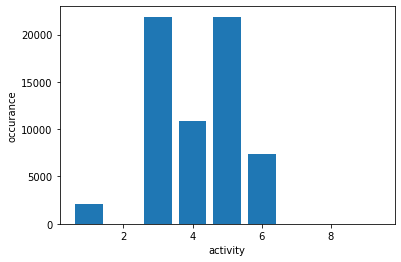

In [32]:
print("stats after filtering dfg compliant cases")
plot_case_occ(df)
  

stats initial
activity   occurance
1             5898
2             270
3             23967
4             11407
5             22976
6             7895
7             0
8             0
9             0


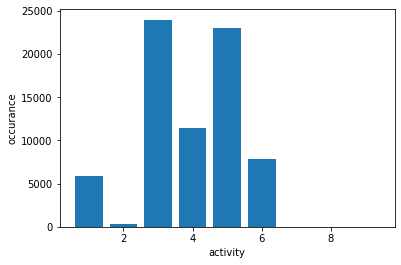

In [33]:
print("stats initial")
plot_case_occ(df2)

In [39]:
# from utils import num_occurance_atob
def num_occurance_atob(a,b,df):
    """
    find num occurance of activity a followed by activity b in dataframe df
    args: a: activity number (dtype: int)
          b: activity number (dtype: int)
          df: dataframe (pandas) where a, b occur (must have ActivityID column)
    returns: num_occurance   (dtype: int)
    """
    h = df[df["class"]==a]
    ind = list(h.index)
    oc = 0
    for i in ind:
        if i < 13709:
            next_act = int(df.iloc[i+1]["class"])
            if next_act == b:
                oc += 1
    return oc
num_occurance_atob(1,2,df2)

4

In [44]:
act = [0, 1, 2, 3, 4, 5, 6]
for a in act:
    for b in act:
        print("{} -> {} : {} ".format(a,b,num_occurance_atob(a,b,df2)))

0 -> 0 : 0 
0 -> 1 : 0 
0 -> 2 : 0 
0 -> 3 : 0 
0 -> 4 : 0 
0 -> 5 : 0 
0 -> 6 : 0 
1 -> 0 : 0 
1 -> 1 : 329 
1 -> 2 : 4 
1 -> 3 : 639 
1 -> 4 : 0 
1 -> 5 : 0 
1 -> 6 : 0 
2 -> 0 : 0 
2 -> 1 : 10 
2 -> 2 : 34 
2 -> 3 : 6 
2 -> 4 : 0 
2 -> 5 : 0 
2 -> 6 : 7 
3 -> 0 : 0 
3 -> 1 : 181 
3 -> 2 : 3 
3 -> 3 : 3208 
3 -> 4 : 0 
3 -> 5 : 983 
3 -> 6 : 0 
4 -> 0 : 0 
4 -> 1 : 32 
4 -> 2 : 0 
4 -> 3 : 35 
4 -> 4 : 1829 
4 -> 5 : 0 
4 -> 6 : 360 
5 -> 0 : 0 
5 -> 1 : 132 
5 -> 2 : 2 
5 -> 3 : 180 
5 -> 4 : 0 
5 -> 5 : 3571 
5 -> 6 : 668 
6 -> 0 : 0 
6 -> 1 : 288 
6 -> 2 : 14 
6 -> 3 : 306 
6 -> 4 : 427 
6 -> 5 : 0 
6 -> 6 : 461 
